## Parte 1 
(imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Coordenadas cromáticas

In [2]:
img_1 = cv.imread('./TP1/coord_cromaticas/CoordCrom_1.png')
img_2 = cv.imread('./TP1/coord_cromaticas/CoordCrom_2.png')
img_3 = cv.imread('./TP1/coord_cromaticas/CoordCrom_3.png')

In [3]:
# tengo que dividir  entre los 3 canales de las imagenes 

def chrom_coord(image):
    image_float = image.astype(np.float32)

    # separar en r,g,b
    r,g,b = cv.split(image_float)

    # normalizo valores rgb, sumo un valor pequelño para evitar dividir por cero
    sum_rgb = r+g+b + 1e-10 
    r_normalizado = r / sum_rgb
    g_normalizado = g /sum_rgb
    b_normalizado = b / sum_rgb

    img_normalizada = cv.merge([r_normalizado, g_normalizado, b_normalizado])

    return img_normalizada


In [12]:
def plot_chrom_coord(image):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(chrom_coord(image), cv.COLOR_BGR2RGB))
    plt.title('Pasaje a coordenadas cromáticas')
    plt.axis('off')

    plt.show()

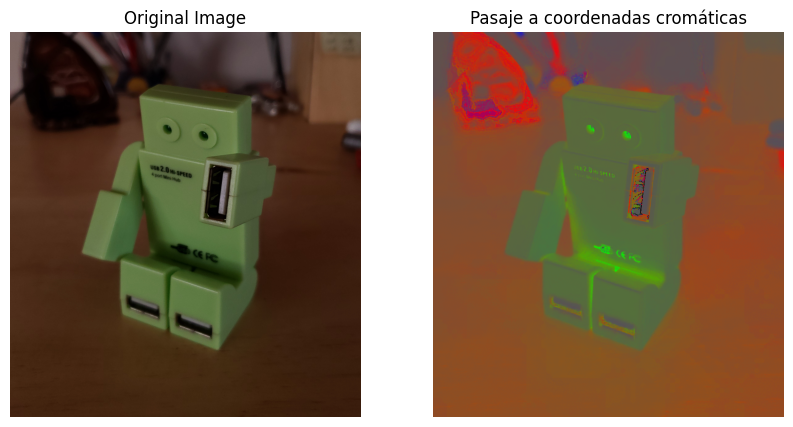

In [13]:
plot_chrom_coord(img_2)

## White patch

In [4]:
img_4 = cv.imread('./TP1/white_patch/test_blue.png')
img_5 = cv.imread('./TP1/white_patch/test_green.png')
img_6 = cv.imread('./TP1/white_patch/test_red.png')
img_7 = cv.imread('./TP1/white_patch/wp_green.png')
img_8 = cv.imread('./TP1/white_patch/wp_red.png')
img_9 = cv.imread('./TP1/white_patch/wp_blue.jpg')
img_10 = cv.imread('./TP1/white_patch/wp_green2.jpg')
img_11 = cv.imread('./TP1/white_patch/wp_red2.jpg')

ALGORITMO WHITE PATCH, balance de blancos.
hay que buscar el maximo global por cada uno de los 3 canales y normalizo al maximo nivel de intensidad que puedo poner en mi imagen (blanco puro) -> 255,255,255
o sea 255 / max * valor de pixel que coreesponda (segun l canal) 


In [5]:
def white_patch(image):
    image_float = image.astype(np.float32)
    
    r,g,b = cv.split(image_float)

    max_r = np.max(r)
    max_g = np.max(g)
    max_b = np.max(b)

    r_normalizado = r / max_r
    g_normalizado = g / max_g
    b_normalizado = b / max_b

    img_normalizada = cv.merge([r_normalizado, g_normalizado, b_normalizado])

    return img_normalizada

In [9]:
def plot_white_patch(image):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(white_patch(image), cv.COLOR_BGR2RGB))
    plt.title('White Patch Corrected Image')
    plt.axis('off')

    plt.show()

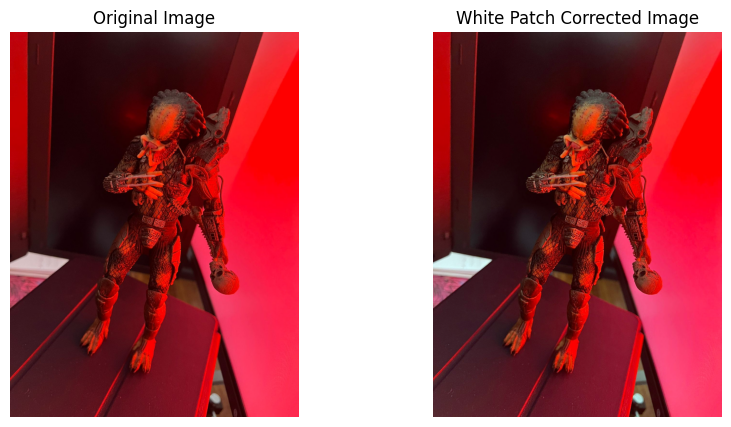

In [21]:
plot_white_patch(img_11)